# Example 7 - Anticline Syncline in the Stolberg Area

The following examples illustrates the geological setting east of the city of Aachen, Germany in the Stolberg area. Here, the Hammerberg Anticline (brown) and Burgholz Syncline (grey, to the southeast) are modeled. The input data is obtained in the field (orientation measurements), the interface points are obtained from the provided geological map. 

<img src="../../data/examples/example7/geolmap.png" width="300">

Source: IS GK 50, Geological Survey NRW

# Importing Libraries

In [1]:
import sys
sys.path.append('../../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Load Data

The data is loaded as for the previous example. For this example we have a simplified geological map of the area, interface points, orientation values, the extent of the model, the DEM (topo) and a selected custom section. The data is loaded as shape files and tif files created with QGIS. 

In [2]:
base_map = rasterio.open('../../../gemgis/data/examples/example7/geolmap.tif')
interfaces = gpd.read_file('../../../gemgis/data/examples/example7/interfaces.shp')
orientations = gpd.read_file('../../../gemgis/data/examples/example7/orientations.shp')
extent = gpd.read_file('../../../gemgis/data/examples/example7/extent.shp')
topo = rasterio.open('../../../gemgis/data/examples/example7/topo.tif')
custom_section = gpd.read_file('../../../gemgis/data/examples/example7/customsection.shp')

# Inspect Data
In the following, the data will be inspected. It can be seen, that we have 10 layer boundaries and 6 orientation values to construct the model. 

In [3]:
interfaces

,id,formation,geometry
0,None,MittlererKohlenkalkGP,"LINESTRING (32301807.736 5622632.704, 32301807..."
1,None,MittlererKohlenkalkGP,"LINESTRING (32301393.687 5624087.122, 32301916..."
2,None,ObererKohlenkalkGP,"LINESTRING (32300930.848 5623914.015, 32300930..."
3,None,ObererKohlenkalkGP,"LINESTRING (32307343.784 5628595.942, 32307343..."
4,None,MittlererKohlenkalkGP,"LINESTRING (32300882.262 5623714.080, 32300882..."
5,None,WilhelmineFM,"LINESTRING (32299713.095 5623016.013, 32299713..."
6,None,ObererKohlenkalkGP,"LINESTRING (32302689.757 5623311.678, 32302689..."
7,None,WilhelmineFM,"LINESTRING (32306635.201 5627081.060, 32307292..."
8,None,WilhelmineFM,"LINESTRING (32306597.208 5626782.483, 32306597..."
9,None,CondrozGP,"LINESTRING (32300422.883 5621055.420, 32300422..."


In [4]:
orientations

,id,dip,azimuth,formation,geometry
0,None,45,315,MittlererKohlenkalkGP,POINT (32302218.004 5624992.302)
1,None,45,315,MittlererKohlenkalkGP,POINT (32306267.988 5628294.741)
2,None,45,135,MittlererKohlenkalkGP,POINT (32302871.940 5624690.649)
3,None,45,135,MittlererKohlenkalkGP,POINT (32306467.660 5627833.826)
4,None,80,315,MittlererKohlenkalkGP,POINT (32302779.189 5623175.886)
5,None,80,315,MittlererKohlenkalkGP,POINT (32307571.276 5627072.482)


In [5]:
extent

,id,geometry
0,None,"POLYGON ((32300000.000 5630000.000, 32300000.0..."


# Create GemPy Data Class

In the next step, we are creating a GemPy Data Class to store the relevant data for the model. 

## Initiate Data Class

In [6]:
geo_data = gg.GemPyData(model_name='Model7', 
                        crs='EPSG:4647')

## Check Attributes

In [7]:
vars(geo_data)

{'model_name': 'Model7',
 'crs': 'EPSG:4647',
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'basemap': None,
 'faults': None,
 'is_fault': None,
 'raw_i': None,
 'raw_o': None,
 'raw_dem': None,
 'slope': None,
 'hillshades': None,
 'aspect': None,
 'wms': None,
 'tectonics': None,
 'customsections': None,
 'contours': None}

## Set Extent

In [8]:
geo_data.set_extent(gdf=extent, minz=-200, maxz=500)
geo_data.extent

[32300000.0, 32310000.0, 5622000.0, 5630000.0, -200, 500]

## Set Resolution

In [9]:
geo_data.set_resolution(50,50,50)
geo_data.resolution

[50, 50, 50]

## Plot Data

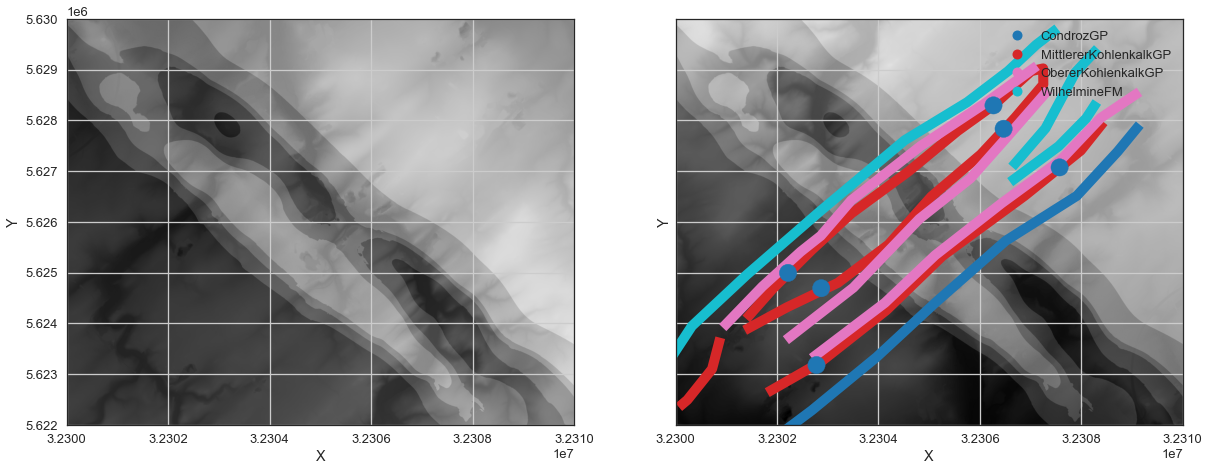

In [10]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray', extent=geo_data.extent[:4])
ax1.imshow(np.flipud(topo.read(1)), origin = 'lower', cmap ='gray', extent=geo_data.extent[:4], alpha=0.5)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray', extent=geo_data.extent[:4])
ax2.imshow(np.fliplr(topo.read(1)), origin = 'lower', cmap ='gray', extent=geo_data.extent[:4], alpha=0.5)

# Plotting the different elements on the geological map

interfaces.plot(ax=ax2, column = 'formation', legend = True, linewidth = 10)
orientations.plot(ax=ax2, column = 'formation', legend = False, s = 300, zorder = 10)

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(geo_data.extent[2],geo_data.extent[3])
ax1.set_xlim(geo_data.extent[0],geo_data.extent[1]);

## Plot Topography

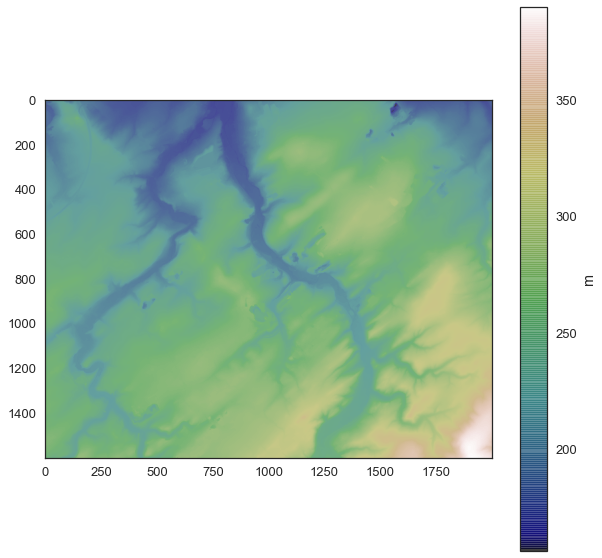

In [11]:
plt.figure(figsize=(10, 10))
im = plt.imshow(topo.read(1), alpha=0.75, cmap='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('m')

# Set Interfaces

In a next step, we are setting the interface points for the model. First, the data will be clipped to the provided extent and then coordinates will be extracted from the gdf. 

In [12]:
interfaces

,id,formation,geometry
0,None,MittlererKohlenkalkGP,"LINESTRING (32301807.736 5622632.704, 32301807..."
1,None,MittlererKohlenkalkGP,"LINESTRING (32301393.687 5624087.122, 32301916..."
2,None,ObererKohlenkalkGP,"LINESTRING (32300930.848 5623914.015, 32300930..."
3,None,ObererKohlenkalkGP,"LINESTRING (32307343.784 5628595.942, 32307343..."
4,None,MittlererKohlenkalkGP,"LINESTRING (32300882.262 5623714.080, 32300882..."
5,None,WilhelmineFM,"LINESTRING (32299713.095 5623016.013, 32299713..."
6,None,ObererKohlenkalkGP,"LINESTRING (32302689.757 5623311.678, 32302689..."
7,None,WilhelmineFM,"LINESTRING (32306635.201 5627081.060, 32307292..."
8,None,WilhelmineFM,"LINESTRING (32306597.208 5626782.483, 32306597..."
9,None,CondrozGP,"LINESTRING (32300422.883 5621055.420, 32300422..."


In [13]:
ints = gg.vector.clip_by_extent(interfaces, geo_data.extent)
ints = ints.reset_index()
ints

,index,formation,points,X,Y,geometry
0,0,MittlererKohlenkalkGP,"(32301807.7363, 5622632.704)",32301807.74,5622632.70,POINT (32301807.736 5622632.704)
1,2,MittlererKohlenkalkGP,"(32302864.2611, 5623237.687399999)",32302864.26,5623237.69,POINT (32302864.261 5623237.687)
2,5,MittlererKohlenkalkGP,"(32304157.4128, 5624257.100099999)",32304157.41,5624257.10,POINT (32304157.413 5624257.100)
3,8,MittlererKohlenkalkGP,"(32305262.3839, 5625325.6544)",32305262.38,5625325.65,POINT (32305262.384 5625325.654)
4,10,MittlererKohlenkalkGP,"(32306884.008500002, 5626513.4794999985)",32306884.01,5626513.48,POINT (32306884.009 5626513.479)
...,...,...,...,...,...,...
67,114,CondrozGP,"(32305116.1965, 5624399.8696)",32305116.20,5624399.87,POINT (32305116.196 5624399.870)
68,115,CondrozGP,"(32306508.5516, 5625624.679599999)",32306508.55,5625624.68,POINT (32306508.552 5625624.680)
69,116,CondrozGP,"(32307910.8459, 5626511.949999998)",32307910.85,5626511.95,POINT (32307910.846 5626511.950)
70,117,CondrozGP,"(32308716.2971, 5627385.6931)",32308716.30,5627385.69,POINT (32308716.297 5627385.693)


In [14]:
interfaces_coords = gg.vector.extract_coordinates(ints,topo)
interfaces_coords

,formation,points,X,Y,geometry,Z
0,MittlererKohlenkalkGP,"(32301807.7363, 5622632.704)",32301807.74,5622632.70,POINT (32301807.736 5622632.704),248.73
1,MittlererKohlenkalkGP,"(32302864.2611, 5623237.687399999)",32302864.26,5623237.69,POINT (32302864.261 5623237.687),263.71
2,MittlererKohlenkalkGP,"(32304157.4128, 5624257.100099999)",32304157.41,5624257.10,POINT (32304157.413 5624257.100),262.01
3,MittlererKohlenkalkGP,"(32305262.3839, 5625325.6544)",32305262.38,5625325.65,POINT (32305262.384 5625325.654),254.66
4,MittlererKohlenkalkGP,"(32306884.008500002, 5626513.4794999985)",32306884.01,5626513.48,POINT (32306884.009 5626513.479),261.76
...,...,...,...,...,...,...
67,CondrozGP,"(32305116.1965, 5624399.8696)",32305116.20,5624399.87,POINT (32305116.196 5624399.870),270.28
68,CondrozGP,"(32306508.5516, 5625624.679599999)",32306508.55,5625624.68,POINT (32306508.552 5625624.680),215.12
69,CondrozGP,"(32307910.8459, 5626511.949999998)",32307910.85,5626511.95,POINT (32307910.846 5626511.950),255.59
70,CondrozGP,"(32308716.2971, 5627385.6931)",32308716.30,5627385.69,POINT (32308716.297 5627385.693),248.41


In [15]:
geo_data.to_gempy_df(interfaces_coords, 'interfaces')
geo_data.interfaces

,index,X,Y,Z,formation
0,0,32301807.74,5622632.70,248.73,MittlererKohlenkalkGP
1,1,32302864.26,5623237.69,263.71,MittlererKohlenkalkGP
2,2,32304157.41,5624257.10,262.01,MittlererKohlenkalkGP
3,3,32305262.38,5625325.65,254.66,MittlererKohlenkalkGP
4,4,32306884.01,5626513.48,261.76,MittlererKohlenkalkGP
...,...,...,...,...,...
67,67,32305116.20,5624399.87,270.28,CondrozGP
68,68,32306508.55,5625624.68,215.12,CondrozGP
69,69,32307910.85,5626511.95,255.59,CondrozGP
70,70,32308716.30,5627385.69,248.41,CondrozGP


# Set Orientations

Orientations were provided and will also be prepared for the model.

In [16]:
orientations_coords = gg.vector.extract_coordinates(orientations,np.flipud(topo.read(1)), extent=geo_data.extent)
orientations_coords['polarity'] = 1
geo_data.to_gempy_df(orientations_coords, 'orientations')
geo_data.orientations

,index,X,Y,Z,formation,dip,azimuth,polarity
0,0,32302218.00,5624992.30,210.45,MittlererKohlenkalkGP,45.00,315.00,1
1,1,32306267.99,5628294.74,290.58,MittlererKohlenkalkGP,45.00,315.00,1
2,2,32302871.94,5624690.65,191.53,MittlererKohlenkalkGP,45.00,135.00,1
3,3,32306467.66,5627833.83,296.54,MittlererKohlenkalkGP,45.00,135.00,1
4,4,32302779.19,5623175.89,175.46,MittlererKohlenkalkGP,80.00,315.00,1
5,5,32307571.28,5627072.48,294.40,MittlererKohlenkalkGP,80.00,315.00,1


# Check Data Class

We now inspect the available and missing data in the data class. 

In [17]:
vars(geo_data)

{'model_name': 'Model7',
 'crs': 'EPSG:4647',
 'extent': [32300000.0, 32310000.0, 5622000.0, 5630000.0, -200, 500],
 'resolution': [50, 50, 50],
 'interfaces':     index           X          Y      Z              formation
 0       0 32301807.74 5622632.70 248.73  MittlererKohlenkalkGP
 1       1 32302864.26 5623237.69 263.71  MittlererKohlenkalkGP
 2       2 32304157.41 5624257.10 262.01  MittlererKohlenkalkGP
 3       3 32305262.38 5625325.65 254.66  MittlererKohlenkalkGP
 4       4 32306884.01 5626513.48 261.76  MittlererKohlenkalkGP
 ..    ...         ...        ...    ...                    ...
 67     67 32305116.20 5624399.87 270.28              CondrozGP
 68     68 32306508.55 5625624.68 215.12              CondrozGP
 69     69 32307910.85 5626511.95 255.59              CondrozGP
 70     70 32308716.30 5627385.69 248.41              CondrozGP
 71     71 32309151.42 5627915.16 241.64              CondrozGP
 
 [72 rows x 5 columns],
 'orientations':    index           X          

# Add Section Dict

Here, we are adding the digitized custom section as a section dict to the data class.

In [18]:
geo_data.to_section_dict(custom_section, 'section')
geo_data.section_dict

{'Section1': ([32303216.331100002, 5629728.148700002],
  [32308325.713600002, 5624422.5474999985],
  [100, 80])}

# Add Stack

Here, we are defining the stratigraphic pile for the model. 

In [19]:
geo_data.interfaces.formation.unique()

array(['MittlererKohlenkalkGP', 'ObererKohlenkalkGP', 'WilhelmineFM',
       'CondrozGP'], dtype=object)

In [20]:
geo_data.stack = {  "Paleozoic": ('WilhelmineFM', 'ObererKohlenkalkGP', 'MittlererKohlenkalkGP', 'CondrozGP'),
                    "basement": ('basement')}
geo_data.stack

{'Paleozoic': ('WilhelmineFM',
  'ObererKohlenkalkGP',
  'MittlererKohlenkalkGP',
  'CondrozGP'),
 'basement': 'basement'}

# Add DEM

The link for the DEM is stored.

In [21]:
geo_data.dem = '../../../gemgis/data/examples/example7/topo.tif'
geo_data.dem

'../../../gemgis/data/examples/example7/topo.tif'

# Visualize Data Set

A first 3D visualization provides insight on how the available data is spatially distributed. 

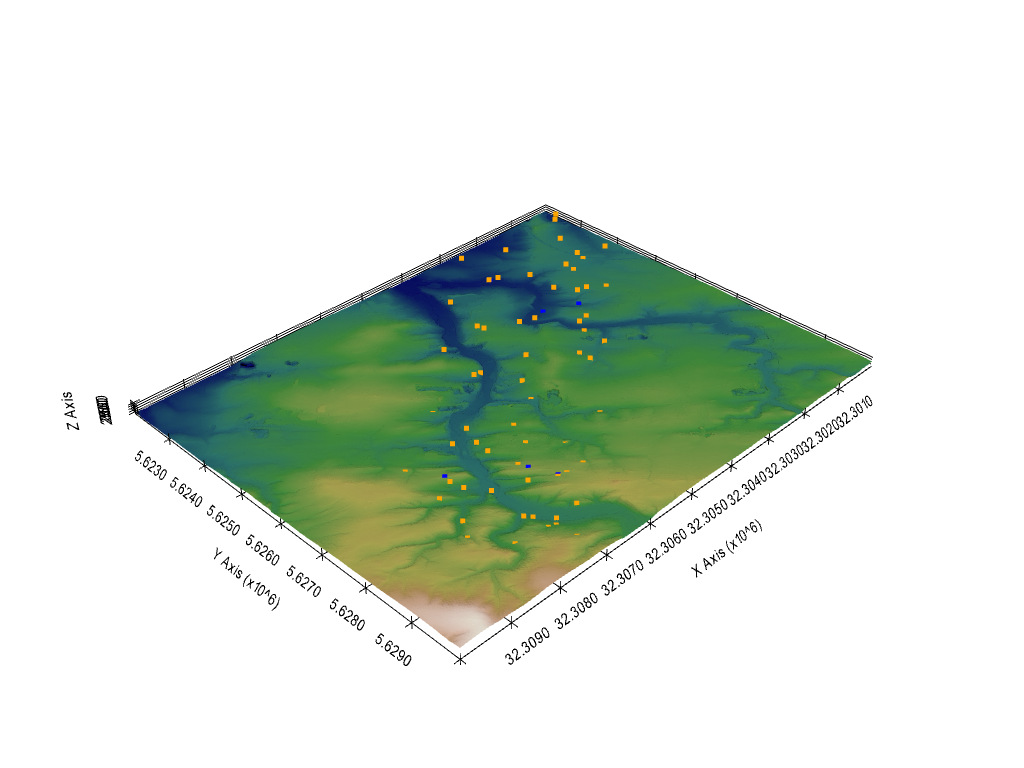

In [22]:
import pyvista as pv
p = pv.Plotter(notebook =True)
gg.visualization.plot_dem_3d(topo, p, cmap = 'gist_earth', extent = geo_data.extent[:4], res = 5)
gg.visualization.plot_points_3d(geo_data.orientations, p, color = 'blue', add_to_z = 10)
gg.visualization.plot_points_3d(geo_data.interfaces, p, color = 'orange', add_to_z = 20)

p.set_background('white')
p.show_grid(color='black')
p.show()

# Create GemPy Model

The final step is now to create a GemPy Model.

## Importing GemPy

Please see https://docs.gempy.org/installation.html for more information on how to install GemPy.

In [23]:
import sys  
sys.path.append('../../../gempy-master')
import gempy as gp
print(gp)
print(gp.__version__)

<module 'gempy' from 'C:\\Users\\ale93371\\Anaconda3\\envs\\test_gempy\\lib\\site-packages\\gempy\\__init__.py'>
2.2.6


## Creating GemPy Model

For more information on how to create a GemPy Model, please see the tutorials at: https://docs.gempy.org/tutorials/index.html. With the attributes of the GemPy Data Class, all necessary variables can be passed to the model.

In [24]:
geo_model = gp.create_model(geo_data.model_name)
geo_model

Model7  2020-10-29 20:14

In [25]:
geo_data.extent

[32300000.0, 32310000.0, 5622000.0, 5630000.0, -200, 500]

In [26]:
gp.init_data(geo_model, geo_data.extent, geo_data.resolution,
             surface_points_df = geo_data.interfaces,
             orientations_df = geo_data.orientations,
             default_values=True)

Active grids: ['regular']


Model7  2020-10-29 20:14

In [27]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,MittlererKohlenkalkGP,Default series,1,#015482,1
1,ObererKohlenkalkGP,Default series,2,#9f0052,2
2,WilhelmineFM,Default series,3,#ffbe00,3
3,CondrozGP,Default series,4,#728f02,4


In [28]:
geo_data.stack

{'Paleozoic': ('WilhelmineFM',
  'ObererKohlenkalkGP',
  'MittlererKohlenkalkGP',
  'CondrozGP'),
 'basement': 'basement'}

In [29]:
gp.map_stack_to_surfaces(geo_model,
                         geo_data.stack,
                         remove_unused_series=True)
geo_model.add_surfaces('basement')

,surface,series,order_surfaces,color,id
0,MittlererKohlenkalkGP,Paleozoic,1,#015482,1
1,ObererKohlenkalkGP,Paleozoic,2,#9f0052,2
2,WilhelmineFM,Paleozoic,3,#ffbe00,3
3,CondrozGP,Paleozoic,4,#728f02,4
4,basement,Paleozoic,5,#443988,5


C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


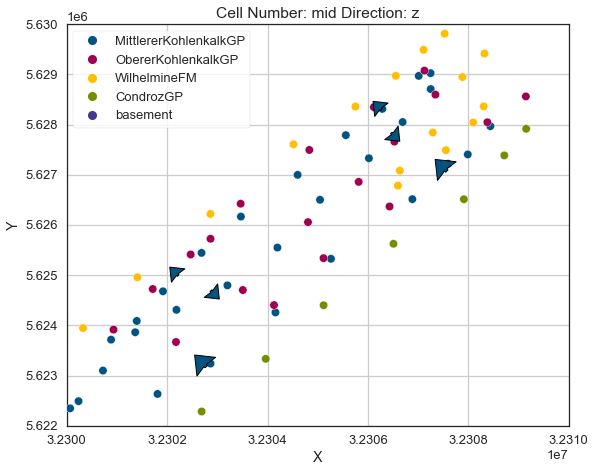

In [30]:
gp.plot_2d(geo_model, direction = 'z')
plt.grid()

A raster created with ArcGIS has to be loaded as the import of the created raster fails. This is due to a bug in `GemPy`described here: https://github.com/cgre-aachen/gempy/issues/492

In [31]:
geo_model.set_topography(
    source='gdal', filepath=geo_data.dem)

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[ 3.23001000e+07,  5.62208000e+06, -1.93000000e+02],
       [ 3.23001000e+07,  5.62208000e+06, -1.79000000e+02],
       [ 3.23001000e+07,  5.62208000e+06, -1.65000000e+02],
       ...,
       [ 3.23099975e+07,  5.62998750e+06,  1.83630005e+02],
       [ 3.23099975e+07,  5.62999250e+06,  1.83250000e+02],
       [ 3.23099975e+07,  5.62999750e+06,  1.83089996e+02]])

In [32]:
geo_model.set_section_grid(geo_data.section_dict)

Active grids: ['regular' 'topography' 'sections']


,start,stop,resolution,dist
Section1,"[32303216.331100002, 5629728.148700002]","[32308325.713600002, 5624422.5474999985]","[100, 80]",7365.81


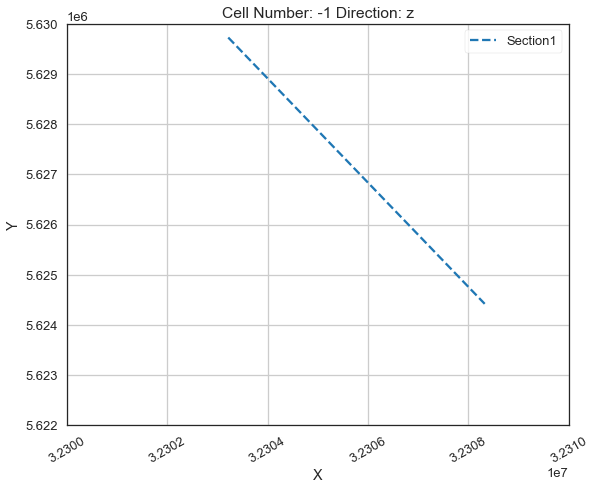

In [33]:
gp.plot.plot_section_traces(geo_model)
plt.grid()

In [34]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                     values
range             12825.37
$C_o$           3916428.57
drift equations        [3]


In [35]:
import skimage
print(skimage.__version__)

0.17.2


In [36]:
sol = gp.compute_model(geo_model)

The geological map had to be created manually as there seems to be a bug when creating the geological map with `GemGIS`. This was reported already: https://github.com/cgre-aachen/gempy/issues/446

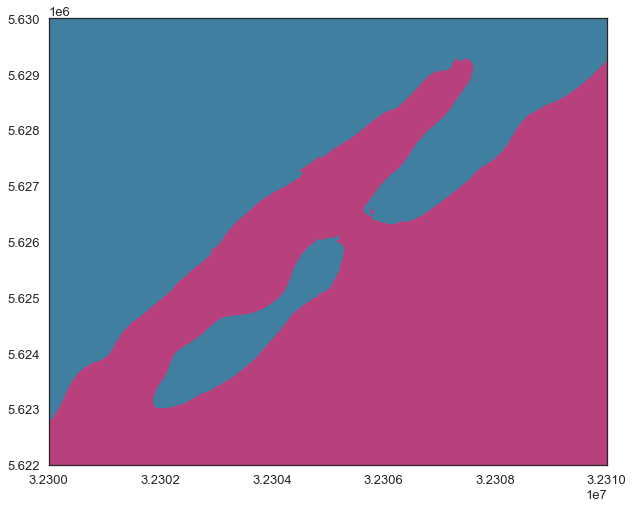

In [37]:
shape = geo_model._grid.topography.values_2d[:, :, 2].shape
geolmap = geo_model.solutions.geological_map[0].reshape(shape)
cols = ['#015482', 	'#9f0052']
plt.figure(figsize=(10, 10))
# plt.imshow(np.flipud(base_map.read(1)), origin='lower',
#            cmap='gray', extent=geo_data.extent[:4])
gmap = np.rot90(geolmap, 1)
plt.imshow(gmap, extent=geo_data.extent[:4],
           alpha=0.75, cmap=ListedColormap(cols))

C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


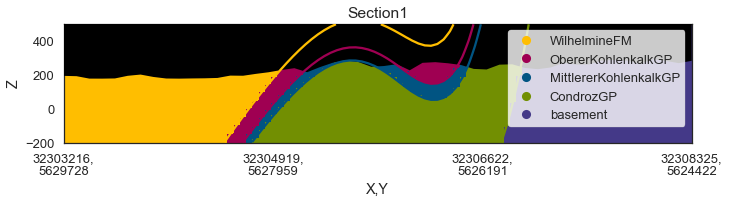

In [38]:
gp.plot_2d(geo_model, section_names=['Section1'], show_topography=True, ve = 2)

C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


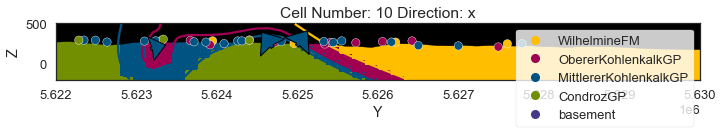

In [39]:
gp.plot_2d(geo_model, direction='x', show_topography=True, cell_number=10, ve=1)

C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


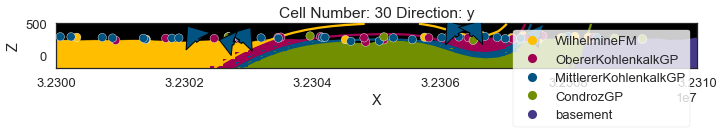

In [40]:
gp.plot_2d(geo_model, direction='y', show_topography=True, cell_number = 30)

In [ ]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, ve = 2)

# Postprocessing - Converting Geological Map to Shape Files

## Create GeoDataFrame with Polygons

In [ ]:
gdf = gg.post.extract_lithologies(geo_model, geo_data.extent[:4], geo_data.crs)
gdf

## Plot Polygons

In [ ]:
gdf.plot(column='formation', cmap=ListedColormap(cols), alpha=0.9)
plt.grid()

## Save Polygons as Shape Files

These polygons can now be saved as shape files and displayed for example as in QGIS shown below. 

In [ ]:
gdf.to_file('../../../gemgis/data/examples/example7/liths.shp')

## Save Polygons as GeoTiff

Rasters like DEMs can be saved as georeferenced tif-files. The same can be done with the geological map obtained from `GemPy` by saving the array of the geological map as tif. 

In [ ]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example7/geolmap.tif',gmap, extent=geo_data.extent, crs='EPSG:4326')

# Create borehole from Geo_Model

Geological models are used to extract information from the subsurface. As geologists, we like to look of the result of the model at a single location and down to the maximum z extent in depth. This is termed a borehole or in the case of fluid extraction a well. These boreholes can easily be extracted and displayed using GemGIS. All you need is the `geo_model` object, the `geo_data` object and the location of your borehole, optionally with its maximum depth. 

In [ ]:
# sol = gg.post.extract_borehole(geo_model, geo_data, [2000,2000])
# sol

# Depth Maps

Depth maps indicate the depth of a surface within the model extent. By applying an intuitive color coding, the spatial position of the respective surface can easily be interpreted. Depth maps can easily be created by executing `gg.visualization.plot_depth_map(...)`. All that is needed is the `geo_model` object and the name of the surface to be plotted. Optionally, a range for the colorbar can be provided to make the maps of different surfaces comparable. Otherwise, the min and max values of each surface are taken for the limits of the color bar. By setting `notebook` to `False` an interactive PyVista Window is opened (press 'Q' to close window safely again).

## Depth Map Layer1

In [ ]:
# gg.visualization.plot_depth_map(geo_model, 'MittlererKohlenkalkGP', clim=[-100, 300], notebook=True)